# Global

Let's check the latest months data and found out what WebViews we have in here.

In [12]:
import pandas as pd

WEBVIEW_APPS = [
    "Facebook",
    "Instagram",
    "Twitter",
    "Snapchat",
    "Pinterest",
    "LinkedIn",
    "Reddit",
    "WhatsApp",
    "Telegram",
    "WeChat",
]

pd.set_option('display.max_columns', None)
df = pd.read_csv('browser_market_share_global.csv')

# Highlight all WebView rows red
def highlight_webview(s):
    return ['background-color: red' if 'WebView' in str(v) else '' for v in s]

# Highlight all apps we assume are using webview orange
def highlight_webview_apps(s):
    # List of apps that are assumed to use WebView

    # Highlight all occurrences of webview apps
    return [
        "background-color: orange" if any(app in str(v) for app in WEBVIEW_APPS) else ""
        for v in s
    ]

# Filter by month
filtered_df = df[df['date'] == '2025-03']
styled_df = filtered_df.style.apply(highlight_webview, subset=['browser'])
styled_df = styled_df.apply(highlight_webview_apps, subset=['browser'])
styled_df

,date,browser,market_share
0,2025-03,Chrome,49.329000
1,2025-03,Safari,13.611000
2,2025-03,Mobile Safari UI/WKWebView,9.077000
3,2025-03,Chrome Mobile WebView,7.565000
4,2025-03,Edge,5.459000
5,2025-03,Firefox,3.191000
6,2025-03,Facebook,3.115000
7,2025-03,Instagram,1.957000
8,2025-03,Samsung Internet,1.788000
9,2025-03,Opera,1.151000


## Split of of WebView traffic and non webview traffic

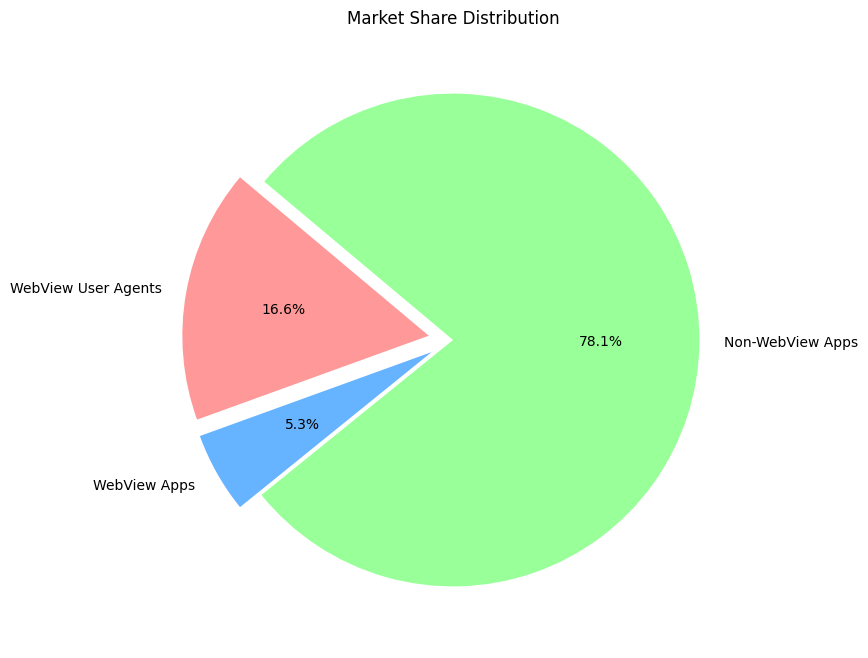

In [ ]:
# Sum market share for WebView rows
webview_rows_sum = filtered_df[
    filtered_df["browser"].str.contains("WebView", case=False, na=False)
]["market_share"].sum()

# Sum market share for WEBVIEW_APPS
webview_apps_sum = filtered_df[filtered_df["browser"].isin(WEBVIEW_APPS)][
    "market_share"
].sum()

# Sum market share for non-WebView apps
non_webview_sum = filtered_df[
    ~filtered_df["browser"].str.contains("WebView", case=False, na=False)
    & ~filtered_df["browser"].isin(WEBVIEW_APPS)
]["market_share"].sum()

# Print the results
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['WebView User Agents', 'WebView Apps', 'Non-WebView']
sizes = [webview_rows_sum, webview_apps_sum, non_webview_sum]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0.1, 0)  # explode the first two slices

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Market Share Distribution')
plt.show()